## <span style="color:rgb(30, 144, 255)">Présentation représentation cartographique et interpolation</span>

<span style="color:white">Ce carnet sert de support de cours pour la présentation en rapport avec la représentaiton des données cartographiques en géosciences. </span>

<span style="color:white">On commence par importer toutes les libraires qui vont nous permettre de récupérer les données.</span>

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.interpolate as intrp
from matplotlib_scalebar.scalebar import ScaleBar

# <span style="color:white">I. Traitement de Données</span>

## A. Chargement des données.

In [2]:
nom_rep = "E:/Etudes/ST4/Intégration de Données en Géosciences/TP/Partie_2_Interpolation" 
# Il faut changer l'adresse du répertoire dans lequel se trouve vos fichiers de données en ".dat"
os.chdir(nom_rep)
print(os.listdir())
nom_fich = 'l3 g2-hi.interpolated.dat' # Choisir le fichier de donnée a traiter en ".dat"
#   Nom des fichiers : 
#       - 'l3 g2-hi.interpolated.dat'
#       - 'medgd12.interpolated.dat'
don_acorr = pd.read_csv(nom_fich, sep = '\s+')
print(don_acorr.columns)
don_acorr.head(10)

['Carnet Interpolation 2022.ipynb', 'Interpolation-Surfer.pdf', 'l3 g2-hi.interpolated.dat', 'l3 g2-hi_corrv1.dat', 'l3 g2-hi_corrv2.dat', 'l3 g2-hi_corrv3.dat', 'medgd12.interpolated.dat', 'medgd12_corrv1.dat', 'medgd12_corrv2.dat', 'medgd12_corrv3.dat', 'Port Folio', 'Refrapy-master']
Index(['x[m]', 'y[m]', 'Date', 'Time', 'Cond.1[mS/m]', 'Inph.1[ppt]',
       'Cond.2[mS/m]', 'Inph.2[ppt]', 'Cond.3[mS/m]', 'Inph.3[ppt]',
       'Inv.Cond.1[mS/m]', 'Inv.Cond.2[mS/m]', 'Inv.Thick', '[m]',
       'Inv.RMS[%]', 'Note'],
      dtype='object')


x[m]  y[m]        Date         Time  Cond.1[mS/m]  Inph.1[ppt]  \
0   0.0   0.0  02/10/2022  18:23:56.82         20.65         2.26   
1   0.0   0.8  02/10/2022  18:23:57.35         15.48         2.20   
2   0.0   1.5  02/10/2022  18:23:57.87         19.80         2.18   
3   0.0   2.2  02/10/2022  18:23:58.32         17.69         2.21   
4   0.0   3.0  02/10/2022  18:23:58.85         18.08         2.19   
5   0.0   3.8  02/10/2022  18:23:59.37         21.18         2.25   
6   0.0   4.5  02/10/2022  18:23:59.82         23.14         2.24   
7   0.0   5.2  02/10/2022  18:24:00.35         22.57         2.28   
8   0.0   6.0  02/10/2022  18:24:00.87         18.69         2.24   
9   0.0   6.8  02/10/2022  18:24:01.32         16.53         2.21   

   Cond.2[mS/m]  Inph.2[ppt]  Cond.3[mS/m]  Inph.3[ppt]  Inv.Cond.1[mS/m]  \
0         19.60         2.76         19.34         4.00             33.02   
1         14.81         2.60         15.39         3.58             15.42   
2         13.07         2.33         14.63         3.05            132.53   
3         16.62         2.64         16.77         3.50             16.80   
4         17.23         2.53         16.60         3.25             28.34   
5         20.75         2.74         16.92         3.18             23.97   
6         21.27         2.57         15.83         2.86             26.65   
7         20.15         2.82         16.36         3.40             26.19   
8         16.08         2.69         14.37         3.43             20.44   
9         15.51         2.49         13.19         2.13             18.76   

   Inv.Cond.2[mS/m]  Inv.Thick  [m]  Inv.RMS[%]  Note  
0             18.23        0.1  3.9         NaN   NaN  
1             14.32        0.6  2.1         NaN   NaN  
2             12.23        0.1  7.4         NaN   NaN  
3             15.61        0.6  2.0         NaN   NaN  
4             15.65        0.1  3.3         NaN   NaN  
5              6.22        1.2  5.0         NaN   NaN  
6              4.32        1.0  8.2         NaN   NaN  
7              5.24        1.0  3.7         NaN   NaN  
8             10.70        0.6  3.2         NaN   NaN  
9              9.82        0.6  3.2         NaN   NaN

## B. Paramétrage des Affichages

##### <span style="color:rgb(222, 184, 135)">Regardons les données une première fois <span style="color:rgb(30, 144, 255)">sans rien faire</span></span> :

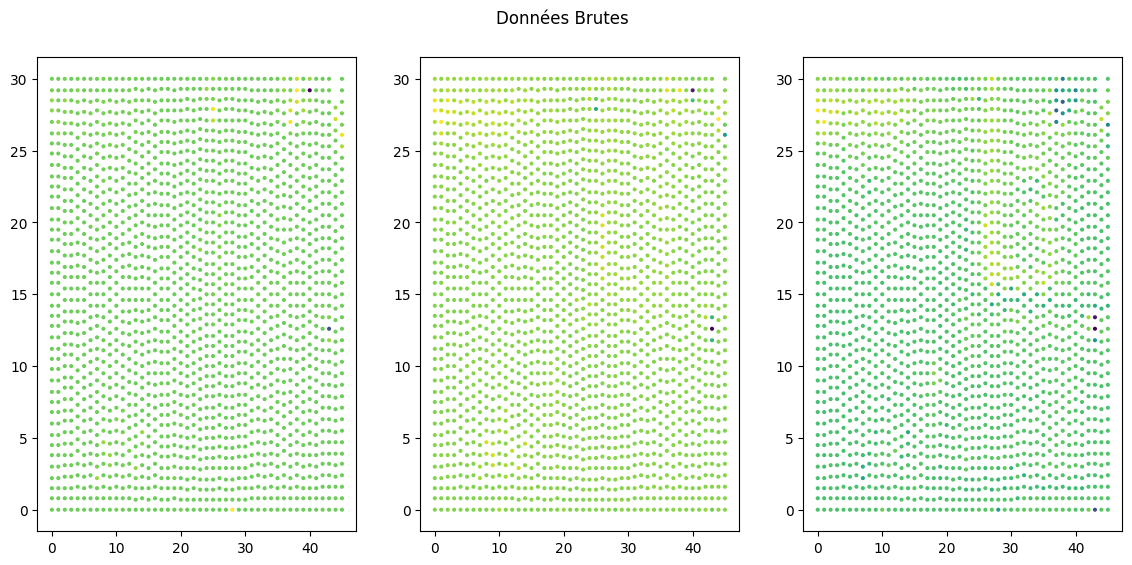

In [3]:
# Affichage des données brutes.

fig0, ax0 = plt.subplots(nrows = 1, ncols = 3, figsize = (14., 6.))

for ic, axc in enumerate(ax0) :
    xc = don_acorr['x[m]']
    yc = don_acorr['y[m]']
    dc = don_acorr['Cond.' + str(ic + 1) + '[mS/m]']
    axc.scatter(xc, yc, c = dc, cmap = 'viridis', marker = '.', s = 15) 
pass


fig0.suptitle('Données Brutes')
fig0.subplots_adjust(top = 0.9)

#   scatter's option :
#       - cmap : couleur (viridis ici)
#       - marker : type de marker pour afficher les points
#       - s = taille des markers
#       - c : (color, sequence, ou array_like) La couleur ou la séquence de couleurs des points
#       - alpha : (float) La transparence des points
#       - linewidths : (scalar ou array_like) L'épaisseur de la ligne pour les bords des points
#       - edgecolors : (color, sequence, ou array_like) La couleur ou la séquence de couleurs des bords des points

##### <span style="color:rgb(30, 144, 255)">Deux problèmes majeurs</span> <span style="color:rgb(222, 184, 135)">sur ces représentations :</span>
1. <span style="color:rgb(222, 184, 135)"> <span style="color:rgb(30, 144, 255)">Les limites des valeurs</span> sont trop large par rapport à la majorité des données donc il faut modifier ça.</span>
2. <span style="color:rgb(222, 184, 135)">Sur les deux axes les valeurs sont en mètres donc, normalement, <span style="color:rgb(30, 144, 255)">l'axe des X devrait avoir une longueur plus grande que l'axe des Y</span></span>.

##### <span style="color:rgb(222, 184, 135)">Remédions à ça :</span>

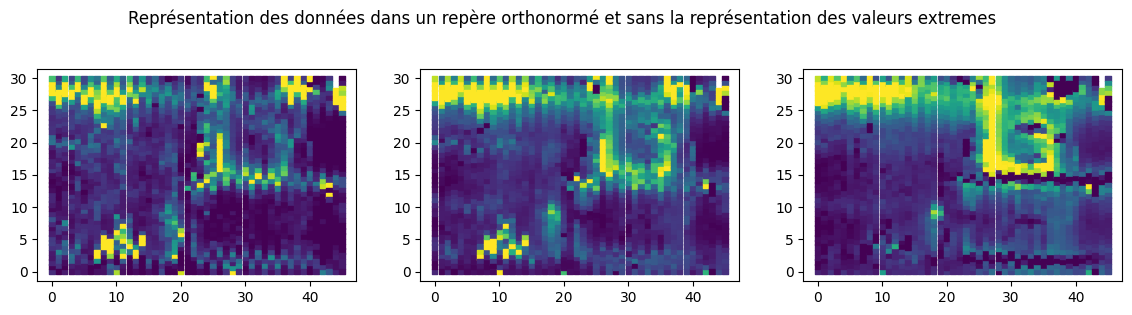

In [4]:
fig0b, ax0b = plt.subplots(nrows = 1, ncols = 3, figsize = (14., 6.))

for ic, axc in enumerate(ax0b) :
    xc = don_acorr['x[m]']
    yc = don_acorr['y[m]']
    dc = don_acorr['Cond.' + str(ic + 1) + '[mS/m]']
    axc.scatter(xc, yc, c = dc, cmap = 'viridis', marker = 's', s = 15, vmin = 15, vmax = 60)
    # 1. min max pour enlever les valeurs extremes
    
    axc.set_aspect('equal')     # 2. Représentation Orthonormé
pass


fig0b.suptitle('Représentation des données dans un repère orthonormé et sans la représentation des valeurs extremes')
fig0b.subplots_adjust(top = 1.3)

<span style="color:rgb(222, 184, 135)">On constate bien l'<span style="color:rgb(30, 144, 255)">effet de feston </span>sur les anomalies qui sont perpendiculaires aux profils.</span> (Effet Feston : effet de vagues perpendiculaire au profil)

<span style="color:rgb(222, 184, 135)">Comme on l'observe aussi sur la voie 3, on peut se dire qu'il y un décalage supplémentaire associé au fait d'avoir fait des aller et retours (c'est assez classique en prospection).</span>

## C. Correction de l'Effet de Feston

<span style="color:rgb(222, 184, 135)">Le fichier est un fichier brut de [<span style="color:yellow">CMD mini explorer</span>](http://www.gfinstruments.cz/index.php?menu=gi&smenu=iem&cont=cmd_&ear=ts),  acquis par les L3 sur l'une des pelouse du campus.</span>

<span style="color:rgb(222, 184, 135)">On commence par préparer les données en souhaitant corriger les décalages entre centres des différentes dispositifs.</span>

In [5]:
# Cellule à compléter en mettant entre les crochets les valeur des écartements trouvés en mètre séparés 
#   par une virgule.
# Vous les trouveraient via le lien ci-dessus : "CMD mini explorer" (Lien en bleue ci-dessus).
ls_ecart = [0.32, 0.71, 1.18] 
ls_decal = []

for ecart in ls_ecart :
    pos_c = np.round(0.59 - ecart/2., 2)
    ls_decal.append(pos_c)
pass
ls_ecart, ls_decal

([0.32, 0.71, 1.18], [0.43, 0.24, 0.0])

<span style="color:rgb(222, 184, 135)">La première difficulté est d' <span style="color:rgb(30, 144, 255)">appliquer les décalages</span> en fonction du profil car il y des allers et des retours.</span>

<span style="color:rgb(222, 184, 135)">Le plus simple est de le faire en détectant les profils à partir de leurs valeurs de X. </span>

In [6]:
ls_yv1, ls_yv2 = list(), list()
#dec_AR est déterminé plus tard, on peut commencé par le mettre à zéro avant de faire l'analyse.

for ix, x in enumerate(don_acorr['x[m]'].unique()): # On applique les décalages en fonction du profil
    ind = don_acorr.index[don_acorr['x[m]'] == x]
    y = don_acorr['y[m]'].loc[ind]

    if ix%2 == 0: #     Test pour connaitre le sens de prospection en fonction de la position x
        ls_yv1.append(y - ls_decal[0])
        ls_yv2.append(y - ls_decal[1]) 

    else:
        ls_yv1.append(y + ls_decal[0]) 
        ls_yv2.append(y + ls_decal[1])
    pass
pass
  

don_acorr['y[m].v1'] = np.concatenate(ls_yv1)
don_acorr['y[m].v2'] = np.concatenate(ls_yv2)
don_acorr.columns

Index(['x[m]', 'y[m]', 'Date', 'Time', 'Cond.1[mS/m]', 'Inph.1[ppt]',
       'Cond.2[mS/m]', 'Inph.2[ppt]', 'Cond.3[mS/m]', 'Inph.3[ppt]',
       'Inv.Cond.1[mS/m]', 'Inv.Cond.2[mS/m]', 'Inv.Thick', '[m]',
       'Inv.RMS[%]', 'Note', 'y[m].v1', 'y[m].v2'],
      dtype='object')

<span style="color:rgb(222, 184, 135)">Affichage des données en prenant en compte les décalages du CMD Mini Explorer </span>

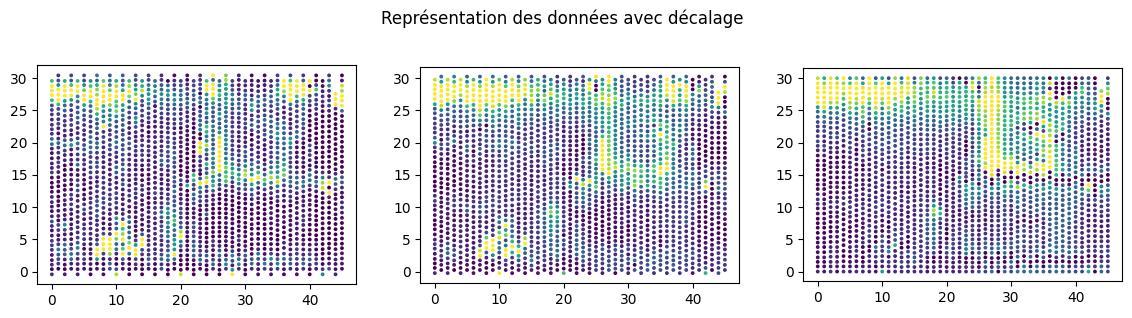

In [7]:
fig0c, ax0c = plt.subplots(nrows = 1, ncols = 3, figsize = (14., 6.))

for ic, axc in enumerate(ax0c) :
    xc = don_acorr['x[m]']

    if ic < 2 :
        yc = don_acorr['y[m].v' + str(ic + 1)]

    else:
        yc = don_acorr['y[m]']
    pass

    dc = don_acorr['Cond.' + str(ic + 1) + '[mS/m]']
    axc.scatter(xc, yc, c = dc, cmap = 'viridis', marker = '.', s = 12, vmin = 15, vmax = 60)
    axc.set_aspect('equal')
pass


fig0c.suptitle('Représentation des données avec décalage')
fig0c.subplots_adjust(top = 1.3)

<span style="color:BurlyWood">C'est globalement mieux mais il reste le petit décalage.</span>

<span style="color:rgb(222, 184, 135)">On peut regarder dans une liste celui qui permet de mieux corriger </span>


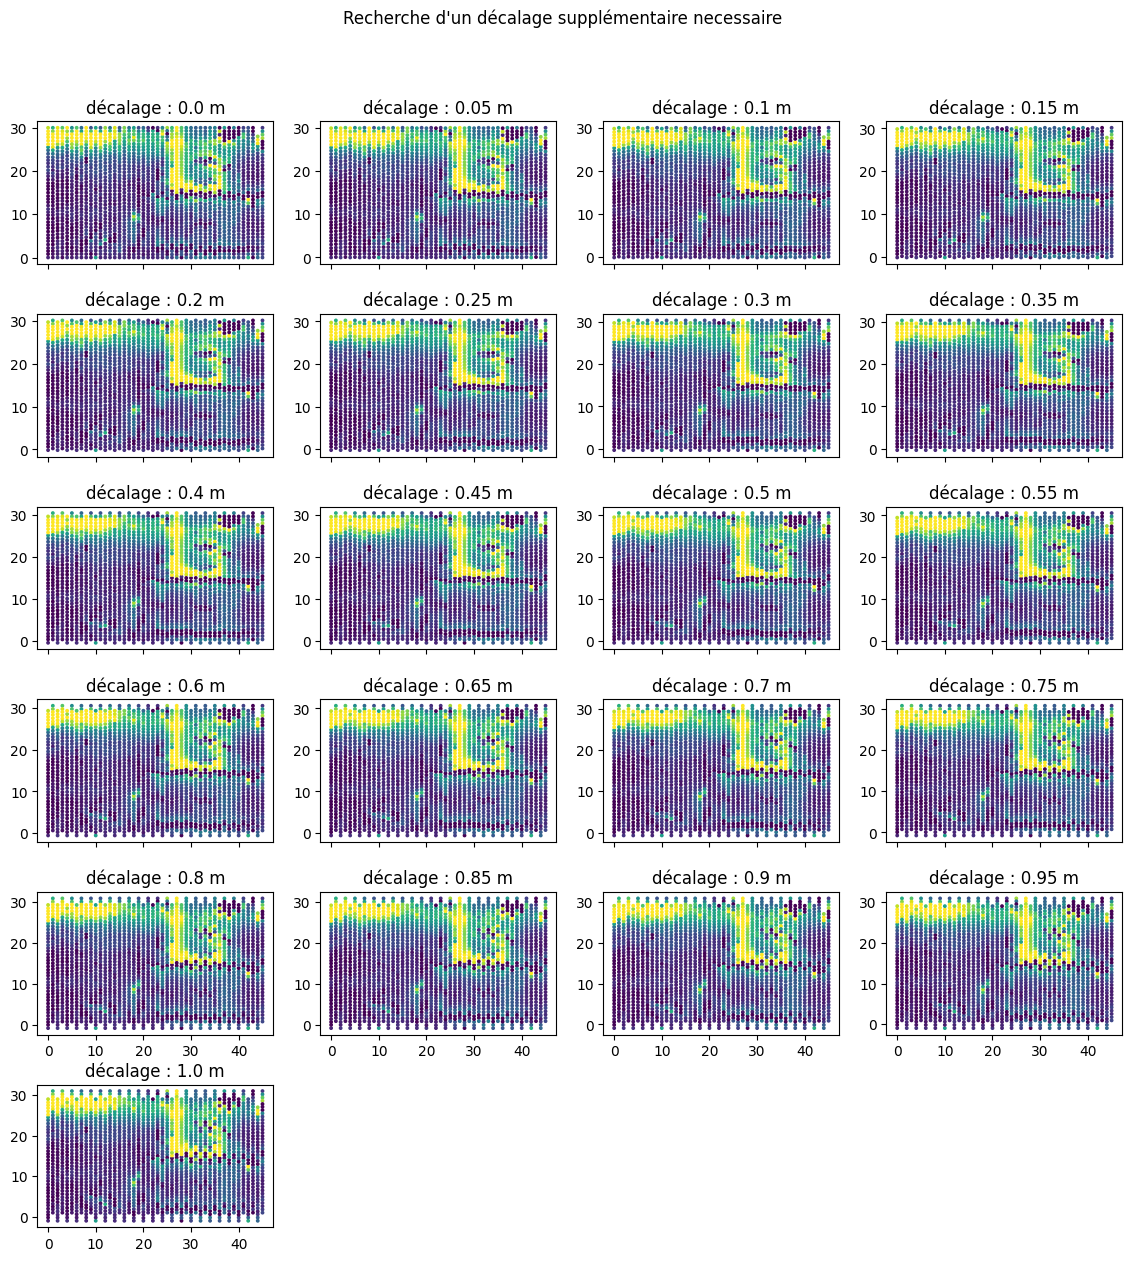

In [8]:
dec_sup = np.arange(0, 1.05, 0.05)
ncol = 4

fig0d, ax0d = plt.subplots(nrows = len(dec_sup)//ncol + 1, ncols = ncol, figsize =(14., 14.))

xc = don_acorr['x[m]']
dc = don_acorr['Cond.3[mS/m]']

for ic, axc in enumerate(ax0d.flatten()):
    yc = don_acorr['y[m]'].copy()

    if ic >= len(dec_sup):
        axc.set_axis_off()

    else:
        dec_c = dec_sup[ic]
        yc.loc[xc%2 == 0] = yc - dec_c
        yc.loc[xc%2 == 1] = yc + dec_c
        
        axc.scatter(xc, yc, c = dc, marker = '.', s = 12, cmap = 'viridis', vmin = 15, vmax = 60)
        axc.set_title("décalage : " + str(np.round(dec_c, 2)) + " m")

        if ic <= (ncol - 1)*(len(dec_sup)//ncol) :
            axc.set_xticklabels('')
        pass
    pass
pass


fig0d.suptitle("Recherche d'un décalage supplémentaire necessaire")
fig0d.subplots_adjust(top = 0.9)
fig0d.subplots_adjust(hspace = 0.35) #  Espacement entre les subplots
        

<span style="color:rgb(222, 184, 135)">Au vu des résultats on peut sans doute rajouter un décalage supplémentaire  de l'ordre de <span style="color:rgb(30, 144, 255)">0.45 m</span> à chaque profil pour améliorer encore l'image.</span>

In [9]:
dec_AR = 0.45   #   On défini maintenant un décalage fixe : dec_AR
ls_yv1, ls_yv2, ls_yv3 = list(), list(), list()

#   On applique dec_AR en plus des décalages definis plus haut, basés sur le CMD mini explorer.
for ix, x in enumerate(don_acorr['x[m]'].unique()):
    ind = don_acorr.index[don_acorr['x[m]'] == x]
    y = don_acorr['y[m]'].loc[ind]
    
    if ix%2 == 0:
        ls_yv1.append(y - ls_decal[0] - dec_AR)
        ls_yv2.append(y - ls_decal[1] - dec_AR)
        ls_yv3.append(y - dec_AR)

    else:
        ls_yv1.append(y + ls_decal[0] + dec_AR)
        ls_yv2.append(y + ls_decal[1] + dec_AR)
        ls_yv3.append(y + dec_AR)
    pass
pass
  
#   On ajoute dans des nouvelles colonnes les données correctement décalées.
don_acorr['y[m].v1'] = np.concatenate(ls_yv1)
don_acorr['y[m].v2'] = np.concatenate(ls_yv2)
don_acorr['y[m].v3'] = np.concatenate(ls_yv3)

don_acorr.head()

x[m]  y[m]        Date         Time  Cond.1[mS/m]  Inph.1[ppt]  \
0   0.0   0.0  02/10/2022  18:23:56.82         20.65         2.26   
1   0.0   0.8  02/10/2022  18:23:57.35         15.48         2.20   
2   0.0   1.5  02/10/2022  18:23:57.87         19.80         2.18   
3   0.0   2.2  02/10/2022  18:23:58.32         17.69         2.21   
4   0.0   3.0  02/10/2022  18:23:58.85         18.08         2.19   

   Cond.2[mS/m]  Inph.2[ppt]  Cond.3[mS/m]  Inph.3[ppt]  Inv.Cond.1[mS/m]  \
0         19.60         2.76         19.34         4.00             33.02   
1         14.81         2.60         15.39         3.58             15.42   
2         13.07         2.33         14.63         3.05            132.53   
3         16.62         2.64         16.77         3.50             16.80   
4         17.23         2.53         16.60         3.25             28.34   

   Inv.Cond.2[mS/m]  Inv.Thick  [m]  Inv.RMS[%]  Note  y[m].v1  y[m].v2  \
0             18.23        0.1  3.9         NaN   NaN    -0.88    -0.69   
1             14.32        0.6  2.1         NaN   NaN    -0.08     0.11   
2             12.23        0.1  7.4         NaN   NaN     0.62     0.81   
3             15.61        0.6  2.0         NaN   NaN     1.32     1.51   
4             15.65        0.1  3.3         NaN   NaN     2.12     2.31   

   y[m].v3  
0    -0.45  
1     0.35  
2     1.05  
3     1.75  
4     2.55

<span style="color:rgb(222, 184, 135)">On trace de nouveau pour voir si il n'y a pas surcorrection</span>


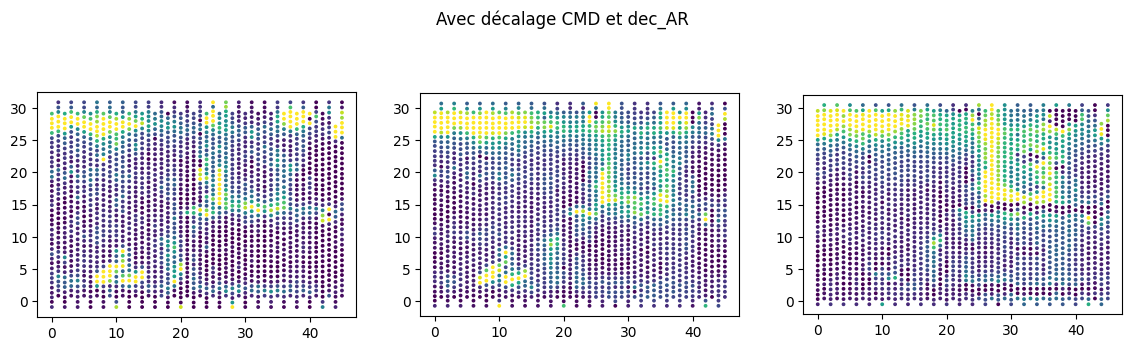

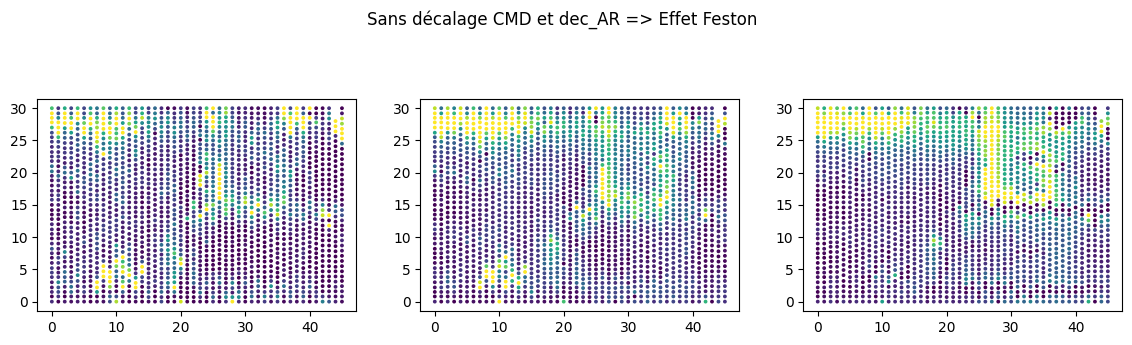

In [10]:
#   On vérifie que le décalage fixe qu'on a ajouter (dec_AR), ne surcorrige pas nos données

fig1, ax1 = plt.subplots(nrows = 1, ncols =3, figsize = (14., 6.))

for ic, axc in enumerate(ax1) :
    xc = don_acorr['x[m]']
    yc = don_acorr['y[m].v' + str(ic + 1)]
    dc = don_acorr['Cond.' + str(ic + 1) + '[mS/m]']
    
    axc.scatter(xc, yc, c = dc, cmap = 'viridis', marker = '.', s = 12, vmin = 15, vmax = 60)
    axc.set_aspect('equal')
pass

fig1.suptitle('Avec décalage CMD et dec_AR')
fig1.subplots_adjust(top = 1.2)

fig1b, ax1b= plt.subplots(nrows = 1, ncols = 3, figsize = (14., 6.))

for ic, axc in enumerate(ax1b) :
    xc = don_acorr['x[m]']
    yc = don_acorr['y[m]']
    dc = don_acorr['Cond.' + str(ic + 1) + '[mS/m]']

    axc.scatter(xc, yc, c = dc, cmap = 'viridis', marker = '.', s = 12, vmin = 15, vmax = 60)
    axc.set_aspect('equal')
pass

fig1b.suptitle('Sans décalage CMD et dec_AR => Effet Feston')
fig1b.subplots_adjust(top = 1.2)


## D. Filtrage des Données

<span style="color:rgb(222, 184, 135)">On va maintenant se focaliser sur la conductivité en créant un <span style="color:rgb(30, 144, 255)">DataFrame</span> qui ne contient que les valeurs corrigées des positions</span>

In [11]:
ls_cond = ['x[m]', 'y[m].v1', 'Cond.1[mS/m]', 'y[m].v2', 'Cond.2[mS/m]', 'y[m].v3', 'Cond.3[mS/m]']

don_acorr2 = don_acorr[ls_cond].copy()

ls_cond2 = [ls_cond[2], ls_cond[4], ls_cond[6]]
ls_coly = [ls_cond[1], ls_cond[3], ls_cond[5]]

don_acorr2.head()

x[m]  y[m].v1  Cond.1[mS/m]  y[m].v2  Cond.2[mS/m]  y[m].v3  Cond.3[mS/m]
0   0.0    -0.88         20.65    -0.69         19.60    -0.45         19.34
1   0.0    -0.08         15.48     0.11         14.81     0.35         15.39
2   0.0     0.62         19.80     0.81         13.07     1.05         14.63
3   0.0     1.32         17.69     1.51         16.62     1.75         16.77
4   0.0     2.12         18.08     2.31         17.23     2.55         16.60

<span style="color:rgb(222, 184, 135)">On va maintenant regarder <span style="color:rgb(30, 144, 255)">les centiles</span> de conductivité</span>

In [12]:
don_acorr2[ls_cond2].quantile(np.arange(0, 1.01, 0.05))

Cond.1[mS/m]  Cond.2[mS/m]  Cond.3[mS/m]
0.00    -1680.1400     -714.5000     -243.5600
0.05       13.9375       15.8225       12.3050
0.10       14.8450       16.6100       16.0550
0.15       15.7200       17.4875       17.5575
0.20       16.5500       18.3300       18.5200
0.25       17.2625       19.1125       19.2975
0.30       17.9550       19.9350       19.9000
0.35       18.6125       20.7575       20.5675
0.40       19.2700       21.7500       21.5100
0.45       20.0325       22.5100       22.3925
0.50       20.9050       23.3400       23.6750
0.55       22.0050       24.6600       25.1100
0.60       23.0100       25.8700       26.9000
0.65       24.3100       27.4100       28.7425
0.70       25.9650       29.3200       31.0450
0.75       27.9200       31.4450       34.6375
0.80       30.3400       34.8600       39.2700
0.85       33.7350       39.2325       43.9350
0.90       39.8250       46.3100       50.4800
0.95       56.5450       59.0875       59.6750
1.00      510.0600      185.7600      121.8700

<span style="color:rgb(222, 184, 135)">On va filtrer les <span style="color:rgb(30, 144, 255)">valeurs négatives</span> (qui correspondent à des éléments métalliques) et les <span style="color:rgb(30, 144, 255)">valeurs trop fortes</span> également</span>

In [13]:
ls_d_fil = list()

#   On filtre les valeurs abérrantes (négatives et trop forte)
for ic in range(len(ls_cond2)):
    cond = don_acorr2[ls_cond2[ic]]
    Q5, Q95 = cond.quantile((0.05, 0.95))
    ind_inf = cond < Q5
    ind_sup = cond > Q95
    ind_fin = np.logical_or(ind_inf, ind_sup)
    ind_f = don_acorr2.index[ind_fin]

    print('Voie ', ic + 1, ' : ', len(ind_f), 'données filtrées')

    cond.loc[ind_fin] = np.nan
    
    ls_d_fil.append(don_acorr2[['x[m]', ls_coly[ic],\
                                ls_cond2[ic]]].loc[np.logical_not(ind_fin)].copy())
pass

Voie  1  :  188 données filtrées
Voie  2  :  188 données filtrées
Voie  3  :  188 données filtrées


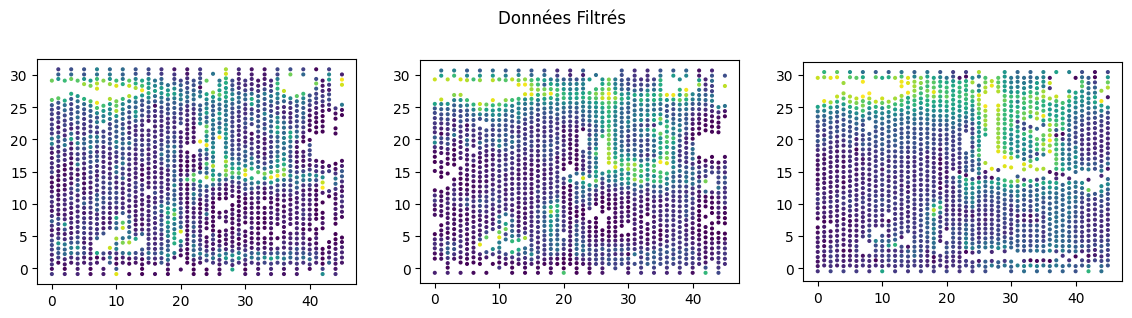

In [14]:
#   On affiche les données filtrés

fig1, ax1 = plt.subplots(nrows = 1, ncols = 3, figsize = (14., 5.))

for ic, pdc in enumerate(ls_d_fil):
    axc = ax1[ic]
    axc.scatter(pdc['x[m]'], pdc[ls_coly[ic]], c = pdc[ls_cond2[ic]],\
                cmap = 'viridis', marker = '.', s = 15)
    axc.set_aspect('equal')
pass

fig1.suptitle('Données Filtrés')
fig1.subplots_adjust(top = 1.2)

In [15]:
for ic, pdc in enumerate(ls_d_fil):
    nomfsav = nom_fich.split('.')[0] + '_corrv' + str(ic + 1) + '.dat'
    pdc.to_csv(nomfsav, index = False)
pass
os.listdir()

['Carnet Interpolation 2022.ipynb',
 'Interpolation-Surfer.pdf',
 'l3 g2-hi.interpolated.dat',
 'l3 g2-hi_corrv1.dat',
 'l3 g2-hi_corrv2.dat',
 'l3 g2-hi_corrv3.dat',
 'medgd12.interpolated.dat',
 'medgd12_corrv1.dat',
 'medgd12_corrv2.dat',
 'medgd12_corrv3.dat',
 'Port Folio',
 'Refrapy-master']

# <span style="color:white">II. Interpolation</span>

<span style="color:rgb(222, 184, 135)">On va maintenant utiliser l'<span style="color:DodgerBlue">interpolation</span> avec <span style="color:yellow">Scipy</span>.</span>

## A. Maillage

<span style="color:rgb(222, 184, 135)">On commence par déterminer le <span style="color:DodgerBlue">minimum</span> et le <span style="color:DodgerBlue">maximum</span> des coordonnées en <span style="color:DodgerBlue">X</span> et en <span style="color:DodgerBlue">Y</span>.</span>

In [16]:
xmin, xmax = pdc['x[m]'].quantile([0, 1])
ymin, ymax = pdc[ls_coly[ic]].quantile([0, 1])

print(xmin, xmax, ymin, ymax)

0.0 45.0 -0.45 30.45


<span style="color:rgb(222, 184, 135)">On va maitenant définir la <span style="color:DodgerBlue">grille</span> sur laquelle on va <span style="color:DodgerBlue">interpoler</span>.</span>

<span style="color:rgb(222, 184, 135)">On peut le faire de deux manières.</span>

<span style="color:rgb(222, 184, 135)">Soit en définissant les <span style="color:DodgerBlue">bornes min</span> et <span style="color:DodgerBlue">max</span> et le <span style="color:DodgerBlue">pas</span>, soit en définissant le <span style="color:DodgerBlue">min</span> et le <span style="color:DodgerBlue">max</span> et le <span style="color:DodgerBlue">nombre de points</span>.</span>

<span style="color:rgb(222, 184, 135)">Pour activer ce dernier mode, il faut donner un nombre <span style="color:DodgerBlue">imaginaire pur</span> dans la partie dédiée au pas dans l'appel à <span style="color:yellow">np.mgrid</span></span> (voir ce qui est commenté ci dessous)

In [17]:
#X_gr, Y_gr = np.mgrid[xmin:xmax + 0.25:0.5,\
#                   ymin:ymax + 0.25:0.5]

#   Création du nombre dans iR (Imaginaire pur)
X_gr, Y_gr = np.mgrid[xmin:xmax:complex(0,91.),\
                   ymin:ymax:complex(0,121.)]
X_gr, Y_gr

(array([[ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
        [ 0.5,  0.5,  0.5, ...,  0.5,  0.5,  0.5],
        [ 1. ,  1. ,  1. , ...,  1. ,  1. ,  1. ],
        ...,
        [44. , 44. , 44. , ..., 44. , 44. , 44. ],
        [44.5, 44.5, 44.5, ..., 44.5, 44.5, 44.5],
        [45. , 45. , 45. , ..., 45. , 45. , 45. ]]),
 array([[-0.45  , -0.1925,  0.065 , ..., 29.935 , 30.1925, 30.45  ],
        [-0.45  , -0.1925,  0.065 , ..., 29.935 , 30.1925, 30.45  ],
        [-0.45  , -0.1925,  0.065 , ..., 29.935 , 30.1925, 30.45  ],
        ...,
        [-0.45  , -0.1925,  0.065 , ..., 29.935 , 30.1925, 30.45  ],
        [-0.45  , -0.1925,  0.065 , ..., 29.935 , 30.1925, 30.45  ],
        [-0.45  , -0.1925,  0.065 , ..., 29.935 , 30.1925, 30.45  ]]))

## B. Orientation et Échelle des Cartes

<span style="color:rgb(222, 184, 135)"> Pour une bonne compréhension des résulats, on doit indiquer l'orientation de nos cartes en fonction du Nord </span>

<span style="color:rgb(222, 184, 135)">Angle de Rotation par rapport au Nord </span> (A remplir)

In [26]:
# Définir l'angle de rotation en degrés
angle = 45

<span style="color:rgb(222, 184, 135)">Création de la flèche indiquant le Nord :</span>

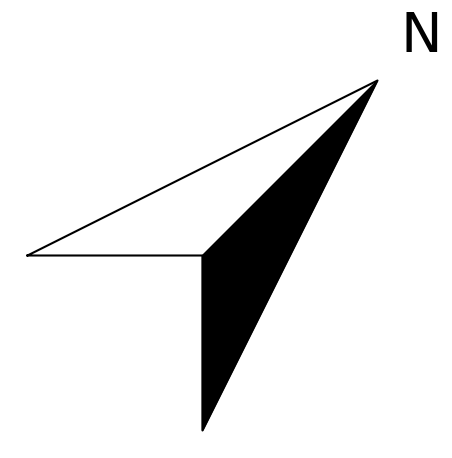

In [27]:
figo, axo = plt.subplots(figsize=(5, 5))

# Définir la forme générale
x = [0, 1, 2, 1, 0]
y = [0, 3, 0, 1, 0]
#la zone à colorier
x_r = [1, 2, 1]
y_r = [1, 0, 3]

# Convertir l'angle en radians
theta = np.radians(angle)

# Définir la matrice de rotation
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, s), (-s, c)))

# Appliquer la rotation aux coordonnées x et y pour la forme générale
x_rot, y_rot = np.dot(R, np.vstack((x, y)))
# Appliquer la rotation aux coordonnées x_r et y_r pour le remplissage
x_r_rot, y_r_rot = np.dot(R, np.vstack((x_r, y_r)))

plt.plot(x_rot, y_rot, 'k')
plt.fill(x_r_rot, y_r_rot, color='k')
axo.set_axis_off()
axo.set_aspect('equal')
xn=x_rot[1]+np.sin(theta)*0.5 #le sinus permet d'ajouter de l'espace entre le sommet du triangle et le N, le 0.5 pour que l'espace ne soit pas trop grand
yn=y_rot[1]+np.cos(theta)*0.5 #idem
axo.text(xn, yn, 'N', fontsize=40, ha='center', va='center', rotation=-0) #on fait pivoter la lettre avec 'rotation'
plt.show()


<span style="color:rgb(222, 184, 135)">Ensuite, il faut afficher l'échelle sur les cartes :</span>

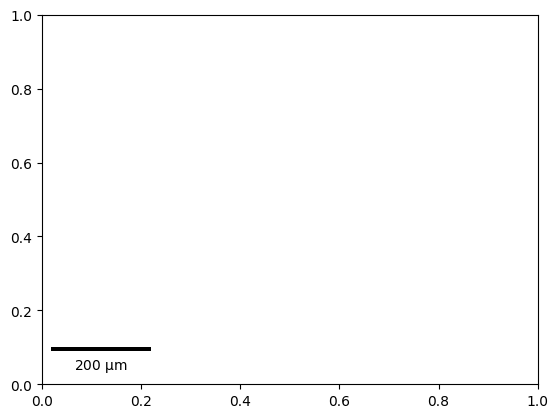

In [37]:
figs, axs = plt.subplots()

# Dessiner votre graphe

scalebar = ScaleBar(1, "mm", length_fraction=0.2, location='lower left', color = 'k', box_color='w', border_pad = 0.5)  # 1 pixel correspond à 1 mm
axs.add_artist(scalebar)

plt.show()

## C. Réalisation de l'interpolation sur la grille

In [20]:
XYdc = pdc[['x[m]', ls_coly[ic]]]
Zdc = pdc[ls_cond2[ic]]
ext = (xmin - 0.5, xmax + 0.5, ymin - 0.5, ymax + 0.5)
gridc = intrp.griddata(XYdc, Zdc, (X_gr, Y_gr))

### <span style="color:rgb(222, 184, 135)">1. Méthode d'interpolation : <span style="color:DodgerBlue">Minimum de Courbure</span> </span>

<span style="color:rgb(222, 184, 135)">On crée une <span style="color:DodgerBlue">figure</span> qui présente plusieures manières de représenter les données avec de nouveaux éléments</span> (comme l'échelle de couleur)

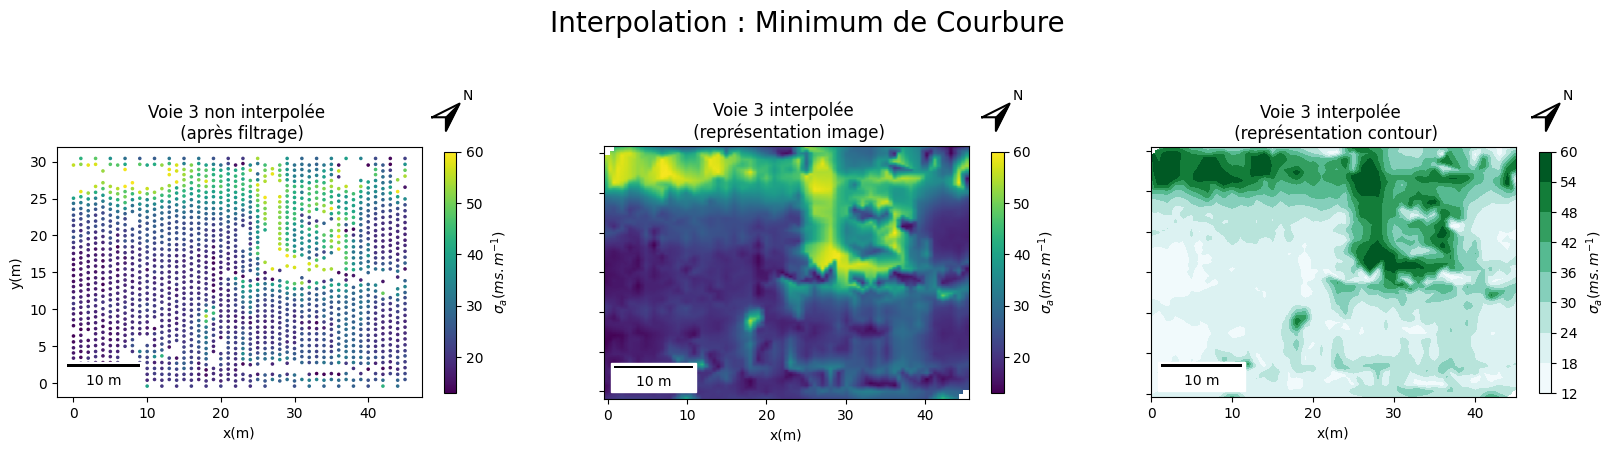

In [30]:
gridc = intrp.griddata(XYdc, Zdc, (X_gr, Y_gr))
fig2, ax2 = plt.subplots(nrows = 1, ncols = 3, figsize = (20., 5.))

scat2 = ax2[0].scatter(pdc['x[m]'], pdc[ls_coly[ic]], c = pdc[ls_cond2[ic]],\
                cmap = 'viridis', marker = '.', s = 10, vmin = 13, vmax = 60)
ax2[0].set_aspect('equal')

im2 = ax2[1].imshow(gridc.T, aspect = 'equal', origin = 'lower', extent = ext, vmin = 13, vmax = 60)
cont2 = ax2[2].contourf(X_gr ,Y_gr, gridc, vmin = 13, vmax = 60, cmap = 'BuGn')
ax2[2].set_aspect('equal')

#   Les listes permettent d'automatiser les différentes légendes et étiquettes pour chaques figures spécifiquement
ls_tit = ['Voie ' + str(ic + 1) + ' non interpolée \n (après filtrage)',\
        'Voie ' + str(ic + 1) + ' interpolée \n (représentation image)',\
       'Voie ' + str(ic + 1) + ' interpolée \n (représentation contour)']
#   Cette liste ocntient les résultats des fonciton .scatter(), .imshow() et .contourf()

ls_cmap = [scat2, im2,cont2]

for ibc, tit in enumerate(ls_tit):
    axc = ax2[ibc]
    axc.set_xlabel('x(m)')
    axc.set_title(tit)

    if ibc < 1 : 
        axc.set_ylabel('y(m)')

    else :
        axc.set_yticklabels('')
    pass

    fig2.colorbar(ls_cmap[ibc], ax = axc, shrink = 0.7, label = r'$\sigma_a (ms.m^{-1})$')
    #    shrink : taille de la color bar
 
    axN = fig2.add_axes([ibc*0.275 + 0.312, 0.5, 0.015, 0.53]) # renvoie un objet Axes
    axN.plot(x_rot, y_rot, 'k')
    axN.fill(x_r_rot, y_r_rot, color='k')
    axN.set_axis_off()
    axN.set_aspect('equal')
    xn=x_rot[1]+np.sin(theta)*0.5 #le sinus permet d'ajouter de l'espace entre le sommet du triangle et le N, le 0.5 pour que l'espace ne soit pas trop grand
    yn=y_rot[1]+np.cos(theta)*0.5 #idem
    axN.text(xn, yn, 'N', fontsize=10, color = 'k') #on fait pivoter la lettre avec 'rotation' (, ha='center', va='center', rotation=-0)

    scalebar = ScaleBar(1, "m", length_fraction=0.25, location='lower left', color = 'k', box_color='w', border_pad = 0.5)  # 1 pixel correspond à 1 mm
    axc.add_artist(scalebar)
pass




fig2.suptitle('Interpolation : Minimum de Courbure', fontsize = 20)
fig2.subplots_adjust(top = 0.8, wspace=0.2)

### <span style="color:rgb(222, 184, 135)">2. Méthode d'interpolation : <span style="color:DodgerBlue">Plus Proche Voisin</span> </span>

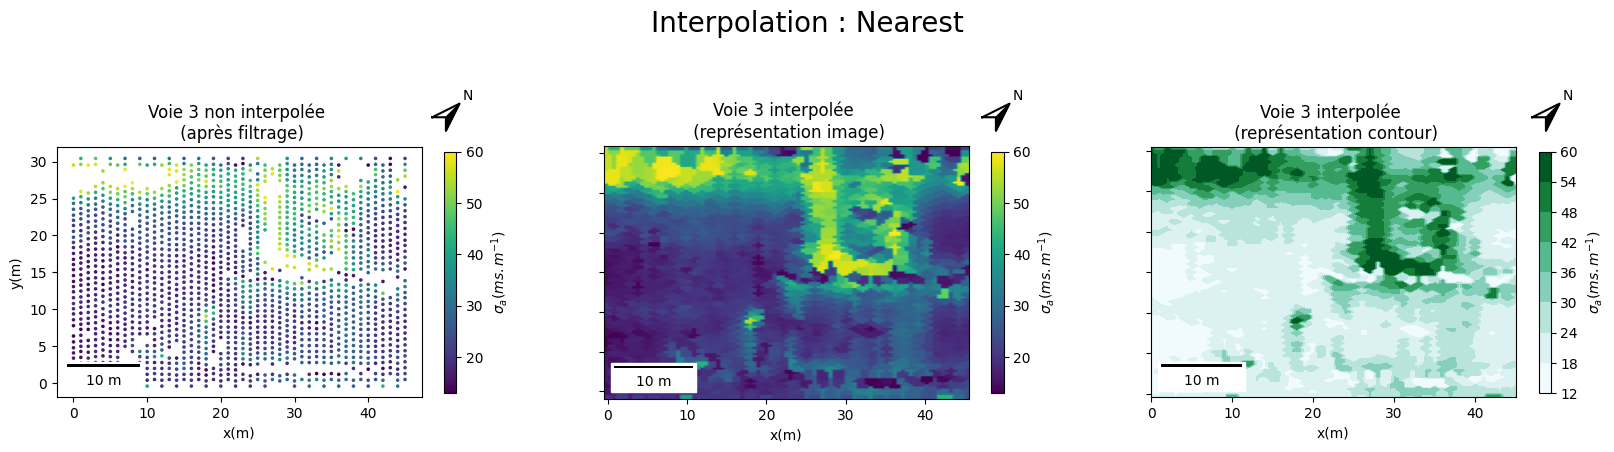

In [31]:
gridc = intrp.griddata(XYdc, Zdc, (X_gr, Y_gr), method = 'nearest')
fig3, ax3 = plt.subplots(nrows = 1, ncols = 3, figsize = (20., 5.))

scat3 = ax3[0].scatter(pdc['x[m]'], pdc[ls_coly[ic]], c = pdc[ls_cond2[ic]],\
                cmap = 'viridis', marker = '.', s = 10, vmin = 13, vmax = 60)
ax3[0].set_aspect('equal')

im3 = ax3[1].imshow(gridc.T, aspect = 'equal', origin = 'lower', extent = ext, vmin = 13, vmax = 60)
cont3 = ax3[2].contourf(X_gr ,Y_gr, gridc, vmin = 13, vmax = 60, cmap = 'BuGn')
ax3[2].set_aspect('equal')

#   Les listes permettent d'automatiser les différentes légendes et étiquettes pour chaques figures spécifiquement
ls_tit = ['Voie ' + str(ic + 1) + ' non interpolée \n (après filtrage)',\
        'Voie ' + str(ic + 1) + ' interpolée \n (représentation image)',\
       'Voie ' + str(ic + 1) + ' interpolée \n (représentation contour)']
#   Cette liste ocntient les résultats des fonciton .scatter(), .imshow() et .contourf()

ls_cmap = [scat3, im3,cont3]

for ibc, tit in enumerate(ls_tit):
    axc = ax3[ibc]
    axc.set_xlabel('x(m)')
    axc.set_title(tit)

    if ibc < 1 : 
        axc.set_ylabel('y(m)')

    else :
        axc.set_yticklabels('')
    pass

    fig3.colorbar(ls_cmap[ibc], ax = axc, shrink = 0.7, label = r'$\sigma_a (ms.m^{-1})$')
    #    shrink : taille de la color bar
    
    axN = fig3.add_axes([ibc*0.275 + 0.312, 0.5, 0.015, 0.53]) # renvoie un objet Axes
    axN.plot(x_rot, y_rot, 'k')
    axN.fill(x_r_rot, y_r_rot, color='k')
    axN.set_axis_off()
    axN.set_aspect('equal')
    xn=x_rot[1]+np.sin(theta)*0.5 #le sinus permet d'ajouter de l'espace entre le sommet du triangle et le N, le 0.5 pour que l'espace ne soit pas trop grand
    yn=y_rot[1]+np.cos(theta)*0.5 #idem
    axN.text(xn, yn, 'N', fontsize=10, color = 'k') #on fait pivoter la lettre avec 'rotation' (, ha='center', va='center', rotation=-0)

    scalebar = ScaleBar(1, "m", length_fraction=0.25, location='lower left', color = 'k', box_color='w', border_pad = 0.5)  # 1 pixel correspond à 1 mm
    axc.add_artist(scalebar)
pass




fig3.suptitle('Interpolation : Nearest', fontsize = 20)
fig3.subplots_adjust(top = 0.8, wspace=0.2)

### <span style="color:rgb(222, 184, 135)">3. Méthode d'interpolation : <span style="color:DodgerBlue">Cubic</span> </span>

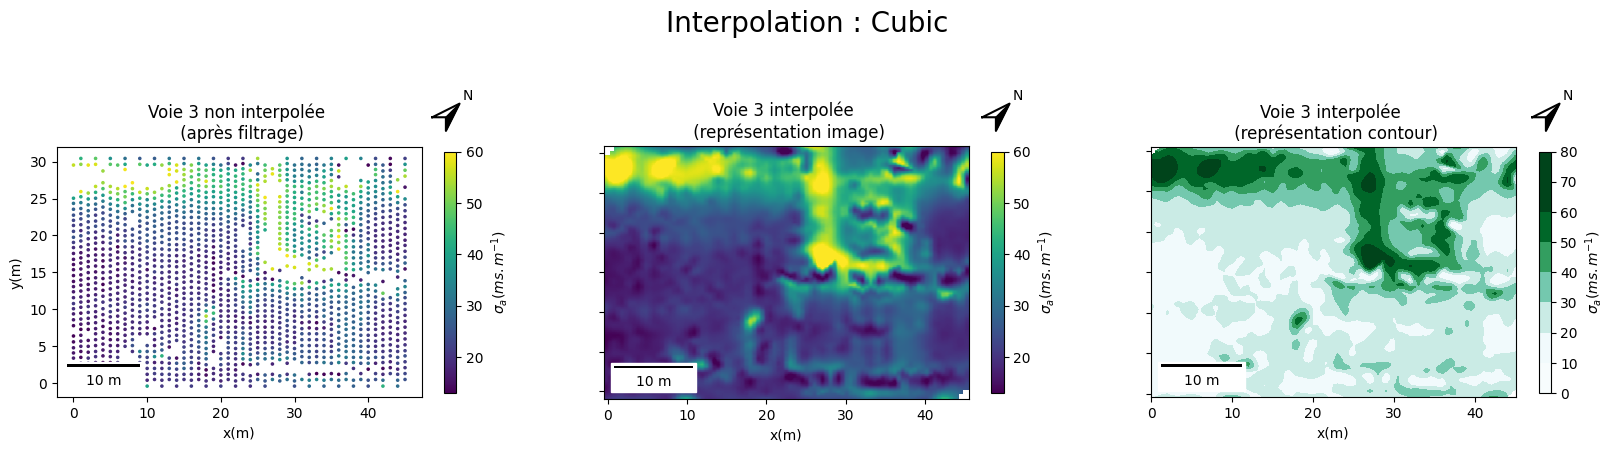

In [32]:
gridc = intrp.griddata(XYdc, Zdc, (X_gr, Y_gr), method = 'cubic')
fig4, ax4 = plt.subplots(nrows = 1, ncols = 3, figsize = (20., 5.))

scat4 = ax4[0].scatter(pdc['x[m]'], pdc[ls_coly[ic]], c = pdc[ls_cond2[ic]],\
                cmap = 'viridis', marker = '.', s = 10, vmin = 13, vmax = 60)
ax4[0].set_aspect('equal')

im4 = ax4[1].imshow(gridc.T, aspect = 'equal', origin = 'lower', extent = ext, vmin = 13, vmax = 60)
cont4 = ax4[2].contourf(X_gr ,Y_gr, gridc, vmin = 13, vmax = 60, cmap = 'BuGn')
ax4[2].set_aspect('equal')

#   Les listes permettent d'automatiser les différentes légendes et étiquettes pour chaques figures spécifiquement
ls_tit = ['Voie ' + str(ic + 1) + ' non interpolée \n (après filtrage)',\
        'Voie ' + str(ic + 1) + ' interpolée \n (représentation image)',\
       'Voie ' + str(ic + 1) + ' interpolée \n (représentation contour)']
#   Cette liste ocntient les résultats des fonciton .scatter(), .imshow() et .contourf()

ls_cmap = [scat4, im4,cont4]

for ibc, tit in enumerate(ls_tit):
    axc = ax4[ibc]
    axc.set_xlabel('x(m)')
    axc.set_title(tit)

    if ibc < 1 : 
        axc.set_ylabel('y(m)')

    else :
        axc.set_yticklabels('')
    pass

    fig4.colorbar(ls_cmap[ibc], ax = axc, shrink = 0.7, label = r'$\sigma_a (ms.m^{-1})$')
    #    shrink : taille de la color bar

    axN = fig4.add_axes([ibc*0.275 + 0.312, 0.5, 0.015, 0.53]) # renvoie un objet Axes
    axN.plot(x_rot, y_rot, 'k')
    axN.fill(x_r_rot, y_r_rot, color='k')
    axN.set_axis_off()
    axN.set_aspect('equal')
    xn=x_rot[1]+np.sin(theta)*0.5 #le sinus permet d'ajouter de l'espace entre le sommet du triangle et le N, le 0.5 pour que l'espace ne soit pas trop grand
    yn=y_rot[1]+np.cos(theta)*0.5 #idem
    axN.text(xn, yn, 'N', fontsize=10, color = 'k') #on fait pivoter la lettre avec 'rotation' (, ha='center', va='center', rotation=-0)

    scalebar = ScaleBar(1, "m", length_fraction=0.25, location='lower left', color = 'k', box_color='w', border_pad = 0.5)  # 1 pixel correspond à 1 mm
    axc.add_artist(scalebar)
pass




fig4.suptitle('Interpolation : Cubic', fontsize = 20)
fig4.subplots_adjust(top = 0.8, wspace=0.2)

# <span style="color:white">Conclusion</span>

<span style="color:White">Pour conclure, on peut faire une première réprésentation</span> (presque) <span style="color:white">satisfaisante des données cartographiques avec <span style="color:yellow">python</span> et les <span style="color:DodgerBlue">librairies</span> disponibles dans <span style="color:yellow">Anaconda</span>.</span>

<span style="color:white">Pour aller plus loin, d'autres modules permettent d'utiliser des interpolateurs plus poussés (tel que [<span style="color:yellow">Verde</span>](https://www.fatiando.org/verde/latest/index.html), [<span style="color:yellow">geostatsmodel</span>](https://github.com/cjohnson318/geostatsmodels) ou encore [<span style="color:yellow">pykriging</span>](http://www.pykriging.com/) et [<span style="color:yellow">pykrige</span>](https://geostat-framework.readthedocs.io/projects/pykrige/en/stable/))</span>

<span style="color:white">Pour mémoire, pensé à faire des environnement séparé quand vous étudiez les possibilités de ces librairies, elles peuvent avoir des formes d'incompatibilité avec les versions d'autre libraire que vous utilisez</span>



# <span style="color:white">Annexe</span>

## A. Code pour affichage Individuelle

<span style="color:rgb(222, 184, 135)"> A changer vous même en fonction de ce que vous voulez afficher </span>

Text(0.5, 1.0, 'Interpolation Cubic \n Voie 3 Interpolée \n (Représentation Image)')

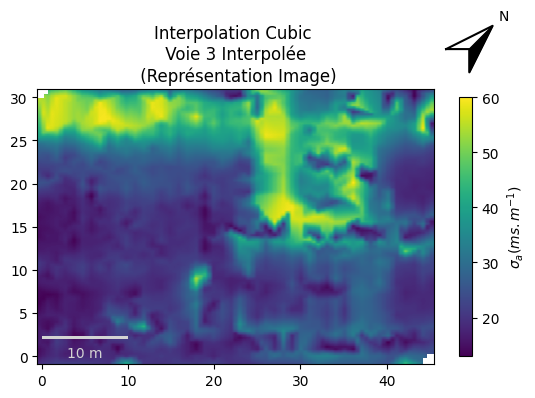

In [33]:
gridc = intrp.griddata(XYdc, Zdc, (X_gr, Y_gr)) # method = None, Nearest, cubic
fig5 = plt.figure()
axes = fig5.add_subplot(111) # Renvoie un objet AxesSubplot, sous classe de Axes

im5 = axes.imshow(gridc.T, aspect = 'equal', origin = 'lower', extent = ext, vmin = 13, vmax = 60)
axes.set_aspect('equal')
fig5.colorbar(im5, ax = axes, shrink = 0.7, label = r'$\sigma_a (ms.m^{-1})$')

scalebar = ScaleBar(1, "m", frameon=False, length_fraction=0.25, location='lower left', color = 'lightgrey')  # 1 pixel correspond à 1 mm
axes.add_artist(scalebar)

axes2 = fig5.add_axes([0.76, 0.5, 0.08, 0.73]) # renvoie un objet Axes
axes2.plot(x_rot, y_rot, 'k')
axes2.fill(x_r_rot, y_r_rot, color='k')
axes2.set_axis_off()
axes2.set_aspect('equal')
xn=x_rot[1]+np.sin(theta)*0.5 #le sinus permet d'ajouter de l'espace entre le sommet du triangle et le N, le 0.5 pour que l'espace ne soit pas trop grand
yn=y_rot[1]+np.cos(theta)*0.5 #idem
axes2.text(xn, yn, 'N', fontsize=10, color = 'k') #on fait pivoter la lettre avec 'rotation' (, ha='center', va='center', rotation=-0)

axes.set_title('Interpolation Cubic \n Voie 3 Interpolée \n (Représentation Image)')


## B. Code pour l'affichage avec interface (Pas finit)

In [ ]:
'''
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
 
# Création d'une fenêtre Tkinter
root = tk.Tk()
root.geometry("400x400")
root.title("Exemple de graphique Tkinter avec Matplotlib")
 
# Création d'une figure Matplotlib
fig = Figure(figsize=(5, 4), dpi=100)
ax = fig.add_subplot(111)
 
# Données du graphique
x = [1, 2, 3, 4, 5]
y = [10, 8, 6, 4, 2]
 
# Tracer le graphique
ax.plot(x, y)
 
# Création d'un canevas Tkinter pour afficher la figure
canvas = FigureCanvasTkAgg(fig3, master=root)
canvas.draw()
canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
 
# Boucle d'événements Tkinter principale
tk.mainloop()
'''

'\nimport tkinter as tk\nfrom matplotlib.backends.backend_tkagg import FigureCanvasTkAgg\nfrom matplotlib.figure import Figure\n \n# Création d\'une fenêtre Tkinter\nroot = tk.Tk()\nroot.geometry("400x400")\nroot.title("Exemple de graphique Tkinter avec Matplotlib")\n \n# Création d\'une figure Matplotlib\nfig = Figure(figsize=(5, 4), dpi=100)\nax = fig.add_subplot(111)\n \n# Données du graphique\nx = [1, 2, 3, 4, 5]\ny = [10, 8, 6, 4, 2]\n \n# Tracer le graphique\nax.plot(x, y)\n \n# Création d\'un canevas Tkinter pour afficher la figure\ncanvas = FigureCanvasTkAgg(fig3, master=root)\ncanvas.draw()\ncanvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)\n \n# Boucle d\'événements Tkinter principale\ntk.mainloop()\n'